 # Problem Statement
 A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

In [422]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [423]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [424]:
#Importing dataset
cars = pd.read_csv('CarPrice_Assignment.csv')
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


Inspect the various aspects of the CarPrice dataframe



In [425]:
 cars.shape

(205, 26)

In [426]:
 cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [427]:
 cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [428]:
#Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()


,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [429]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Fixing invalid values


maxda = mazda
Nissan = nissan
porsche = porcshce
toyota = toyouta
vokswagen = volkswagen =  vw

In [430]:
cars['CompanyName'] = cars['CompanyName'].replace({'vw': 'volkswagen','vokswagen': 'volkswagen', 'toyouta':'toyota','Nissan':'nissan','maxda':'mazda','porcshce':'porsche'})
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [431]:
#Checking for duplicates
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [432]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Visualising the Data

In [433]:
import matplotlib.pyplot as plt
import seaborn as sns

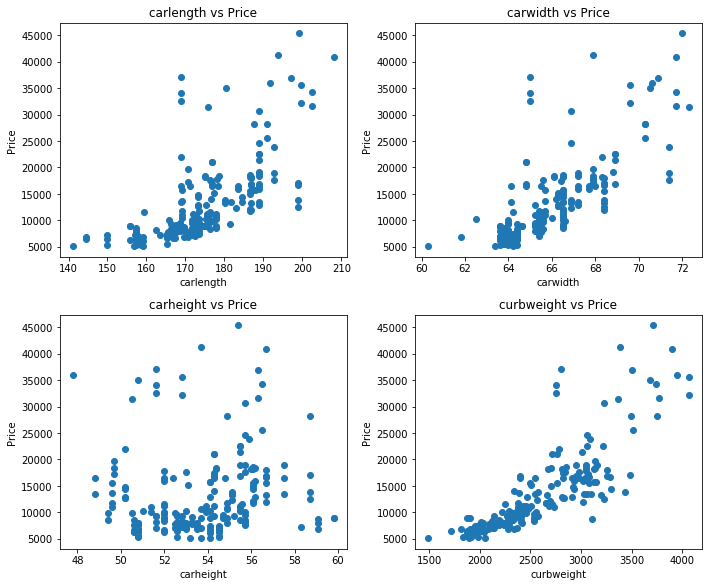

In [434]:
#Scatter plots for Numerical Variables
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

Inference :
carwidth, carlength , curbweight have a correlation that of price.
carheight doesnot show correlation or trend with price.

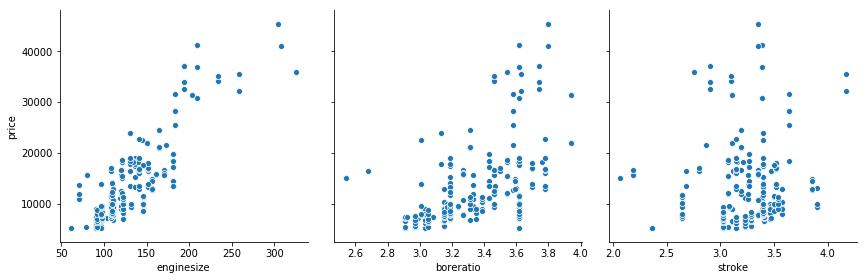

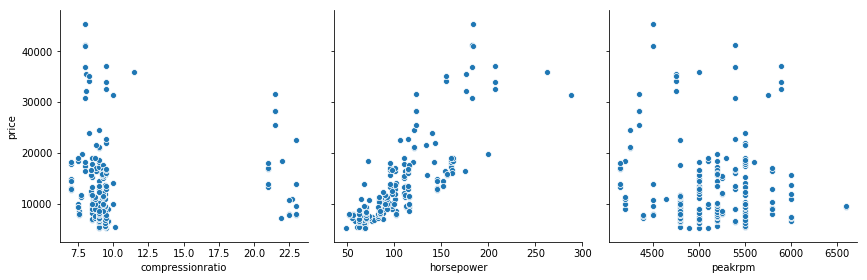

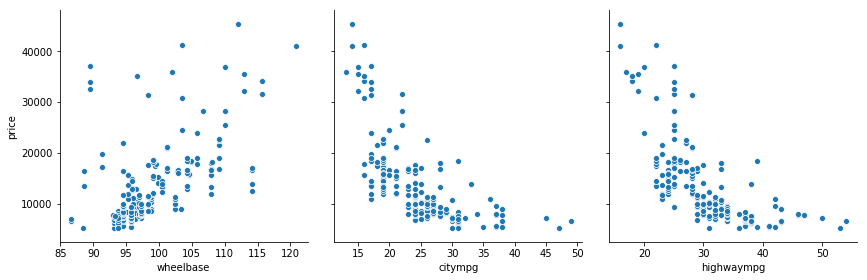

In [435]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')


Inference :
enginesize, boreratio, horsepower, wheelbase  have a significant positive correlation with price.
citympg, highwaympg have a significant negative correlation with price.



# Visualising Categorical Variables
As we  might have noticed, there are a few categorical variables as well. 
  CompanyName, Symboling, fueltype,enginetype, carbody, doornumber, enginelocation, fuelsystem,       cylindernumber,aspiration,drivewheel



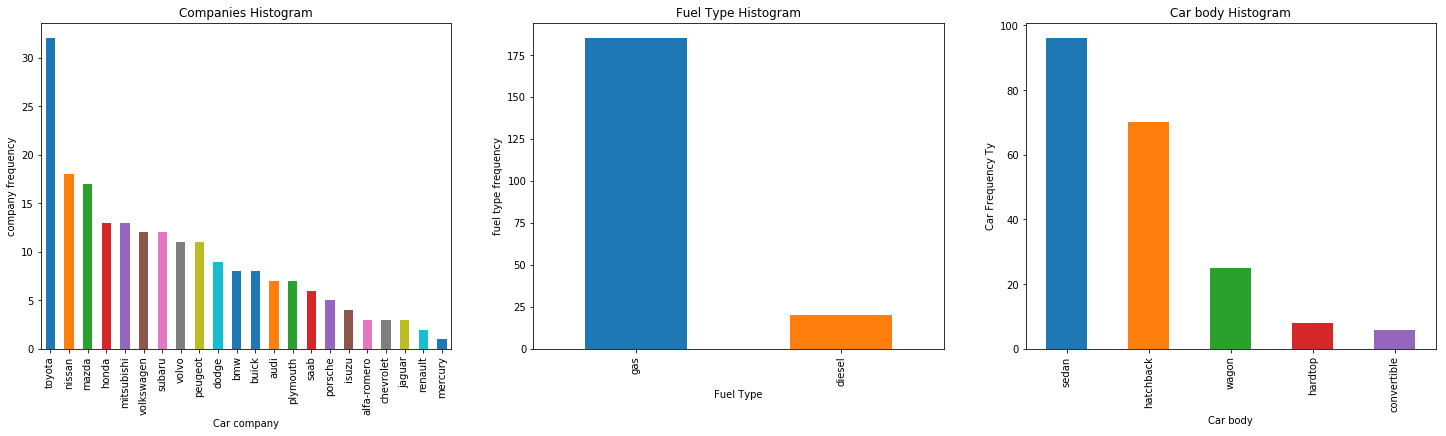

In [436]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot('bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='company frequency')


plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot('bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='fuel type frequency')

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot('bar')
plt.title('Car body Histogram')
plt1.set(xlabel = 'Car body', ylabel='Car Frequency Ty')

plt.show()

Toyota is showing high frequency car company.
Number of gas fueled cars are used  more than diesel.
sedan is the top car type prefered.

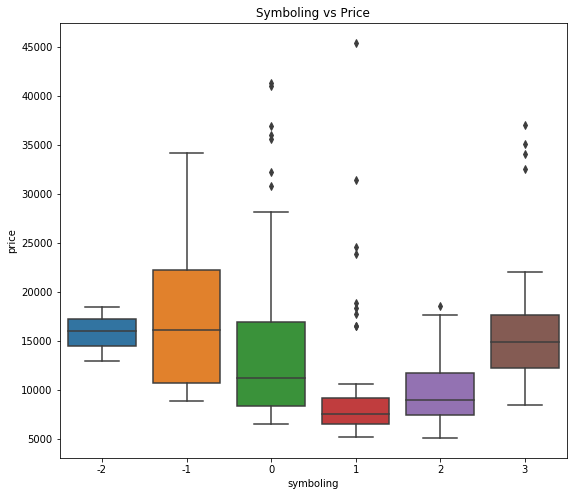

In [437]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price)

plt.show()

Inference :In box plot  the cars with -1 symboling seems to be high priced.

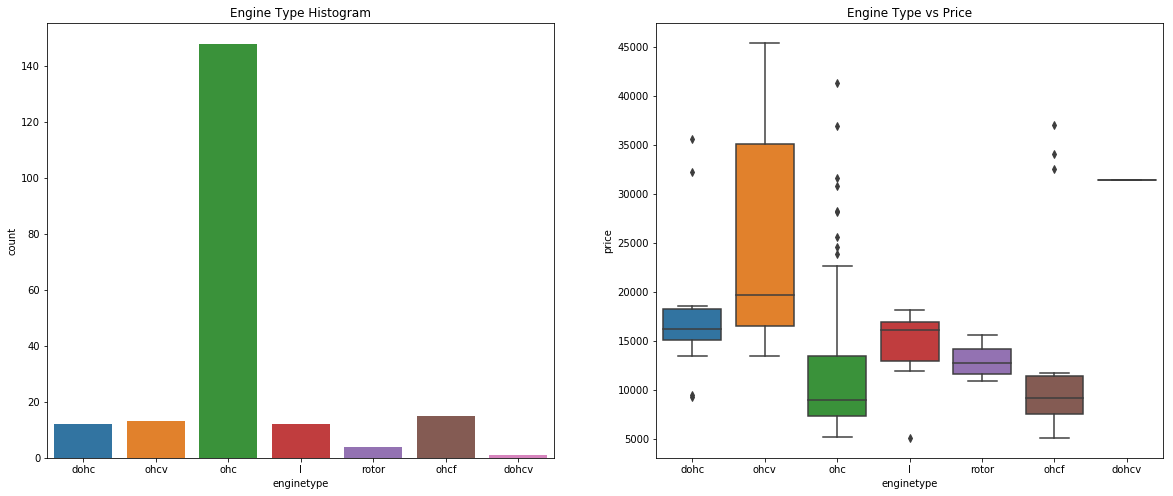

In [438]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars.enginetype)

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price)

plt.show()



Inference :
ohc Engine type favored count.
ohcv has the highest price range , ohc  have the low price range.

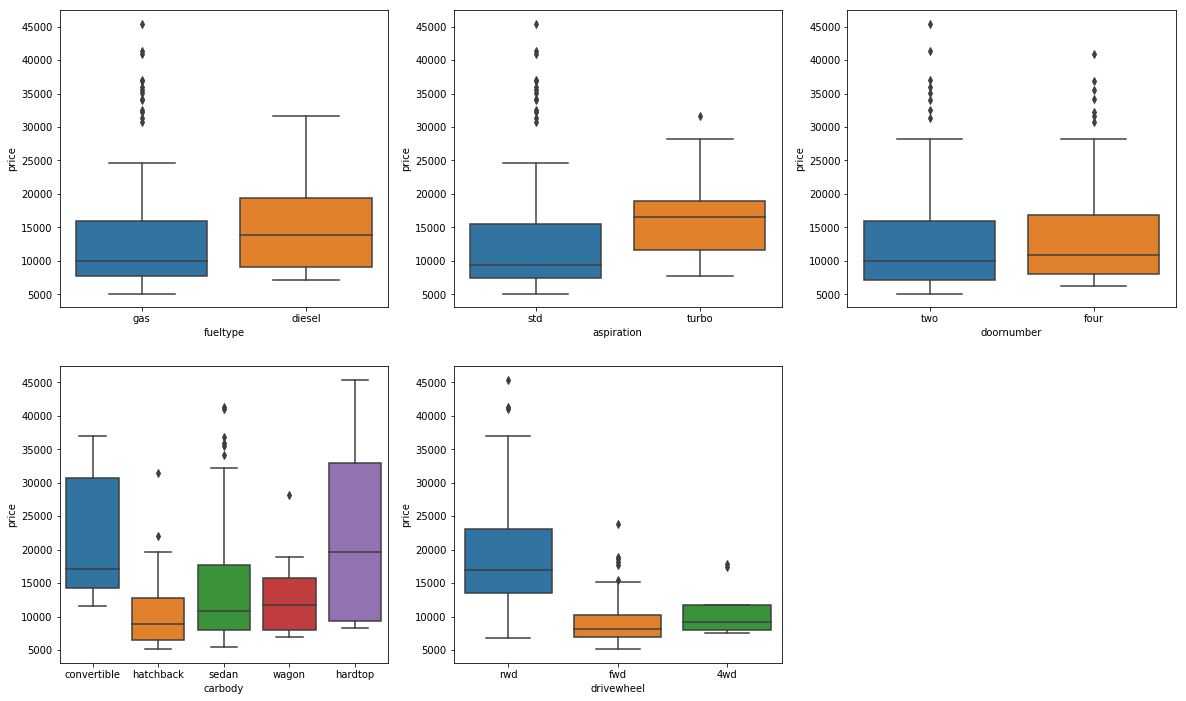

In [439]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars)
plt.subplot(2,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = cars)
plt.subplot(2,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = cars)
plt.subplot(2,3,5)
sns.boxplot(x = 'drivewheel',  y = 'price', data = cars)
plt.show()

Inference:
    Deisel is having higher than gas.
    It seems aspiration with turbo have higher price range than the std.
    doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
    carbody hardtop is having high price.
    Most high ranged cars seeme to prefer rwd drivewheel.
    

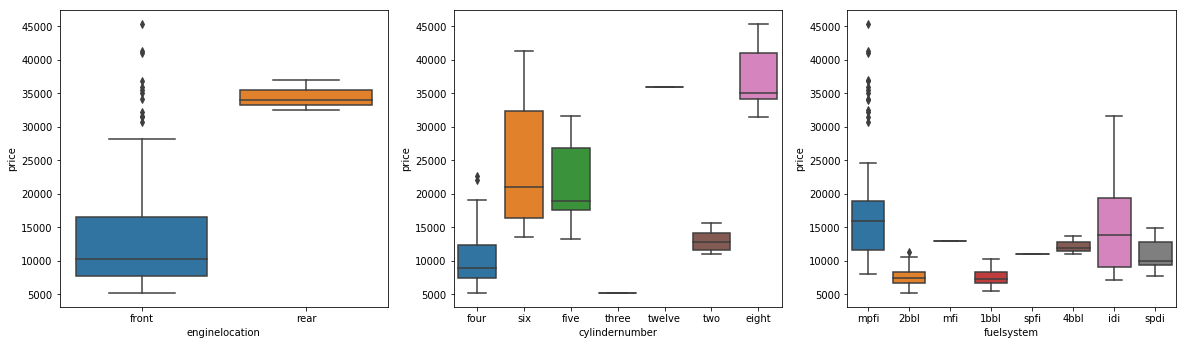

In [440]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars)
plt.subplot(2,3,2)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars)
plt.subplot(2,3,3)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars)
plt.show()

Inference:
Very few datapoints for enginelocation categories to make an inference.
Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference



# Get the dummy variables 


In [441]:
#copying cars dataframe into new dataframe
cars_price = cars.copy()
cars_price.head() 
 



,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [442]:
##Replacing the column strings into numeric value
cars_price['fueltype'] = np.where(cars_price['fueltype'].str.contains('gas'), 1, 0)
cars_price['aspiration'] = np.where(cars_price['aspiration'].str.contains('std'), 1, 0)
cars_price['enginelocation'] = np.where(cars_price['enginelocation'].str.contains('front'), 1, 0)
cars_price['doornumber'] = np.where(cars_price['doornumber'].str.contains('two','four'), 0, 1)
cars_price['cylindernumber'] = cars_price['cylindernumber'] .map({'two' : 2, 'three' : 3,'four' : 4,'five' :5,'six':6 , 'eight' :8,'twelve': 12})

cars_price.head()  

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,1,1,0,convertible,rwd,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,1,1,0,convertible,rwd,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,1,1,0,hatchback,rwd,1,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,1,1,1,sedan,fwd,1,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,1,1,1,sedan,4wd,1,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [443]:
cars_price.shape

(205, 26)

In [444]:
#Creating Dummy variables
dummy_var = pd.get_dummies(cars_price['CompanyName'], drop_first = True)
cars_price = pd.concat([cars_price, dummy_var], axis = 1)
cars_price = cars_price.drop('CompanyName',axis=1)
dummy_var1 = pd.get_dummies(cars_price['carbody'], drop_first = True)
cars_price = pd.concat([cars_price, dummy_var1], axis = 1)
cars_price = cars_price.drop('carbody',axis=1)
dummy_var2 = pd.get_dummies(cars_price['drivewheel'], drop_first = True)
cars_price = pd.concat([cars_price, dummy_var2], axis = 1)
cars_price = cars_price.drop('drivewheel',axis=1)
dummy_var3 = pd.get_dummies(cars_price['enginetype'], drop_first = True)
cars_price = pd.concat([cars_price, dummy_var3], axis = 1)
cars_price = cars_price.drop('enginetype',axis=1)
dummy_var4 = pd.get_dummies(cars_price['fuelsystem'], drop_first = True)
cars_price = pd.concat([cars_price, dummy_var3], axis = 1)
cars_price = cars_price.drop('fuelsystem',axis=1)
cars_price.head()



,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohc,ohcf,ohcv,rotor,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,3,1,1,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,2,3,1,1,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,0,1,94.5,171.2,65.5,52.4,...,0,0,1,0,0,0,0,0,1,0
3,4,2,1,1,1,1,99.8,176.6,66.2,54.3,...,1,0,0,0,0,0,1,0,0,0
4,5,2,1,1,1,1,99.4,176.6,66.4,54.3,...,1,0,0,0,0,0,1,0,0,0


Splitting the Data into Training and Testing Sets

In [445]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(cars_price, train_size = 0.7, test_size = 0.3, random_state = 100)

Rescaling the Features

In [446]:
from sklearn.preprocessing import MinMaxScaler

In [447]:
scaler = MinMaxScaler()

In [448]:
# Apply scaler() to the columns 
num_vars = ['symboling','wheelbase', 'curbweight','carlength','carwidth','carheight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg' ,'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [449]:
df_train.head()


,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohc,ohcf,ohcv,rotor,dohcv,l,ohc,ohcf,ohcv,rotor
122,123,0.6,1,1,1,1,0.244828,0.426016,0.291667,0.265487,...,1,0,0,0,0,0,1,0,0,0
125,126,1.0,1,1,0,1,0.272414,0.452033,0.666667,0.212389,...,1,0,0,0,0,0,1,0,0,0
166,167,0.6,1,1,0,1,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,1,0,1,0.068966,0.450407,0.316667,0.088496,...,0,0,0,0,0,0,0,0,0,0
199,200,0.2,1,0,1,1,0.610345,0.775610,0.575000,0.858407,...,1,0,0,0,0,0,1,0,0,0


In [450]:
df_train.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohc,ohcf,ohcv,rotor,dohcv,l,ohc,ohcf,ohcv,rotor
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,98.524476,0.559441,0.909091,0.818182,0.559441,0.993007,0.411141,0.525476,0.461655,0.509004,...,0.685315,0.083916,0.062937,0.027972,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972
std,58.977655,0.239200,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,...,0.466023,0.278236,0.243703,0.165472,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.500000,0.400000,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,0.600000,1.000000,1.000000,1.000000,1.000000,0.341379,0.502439,0.425000,0.522124,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,147.500000,0.600000,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,205.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


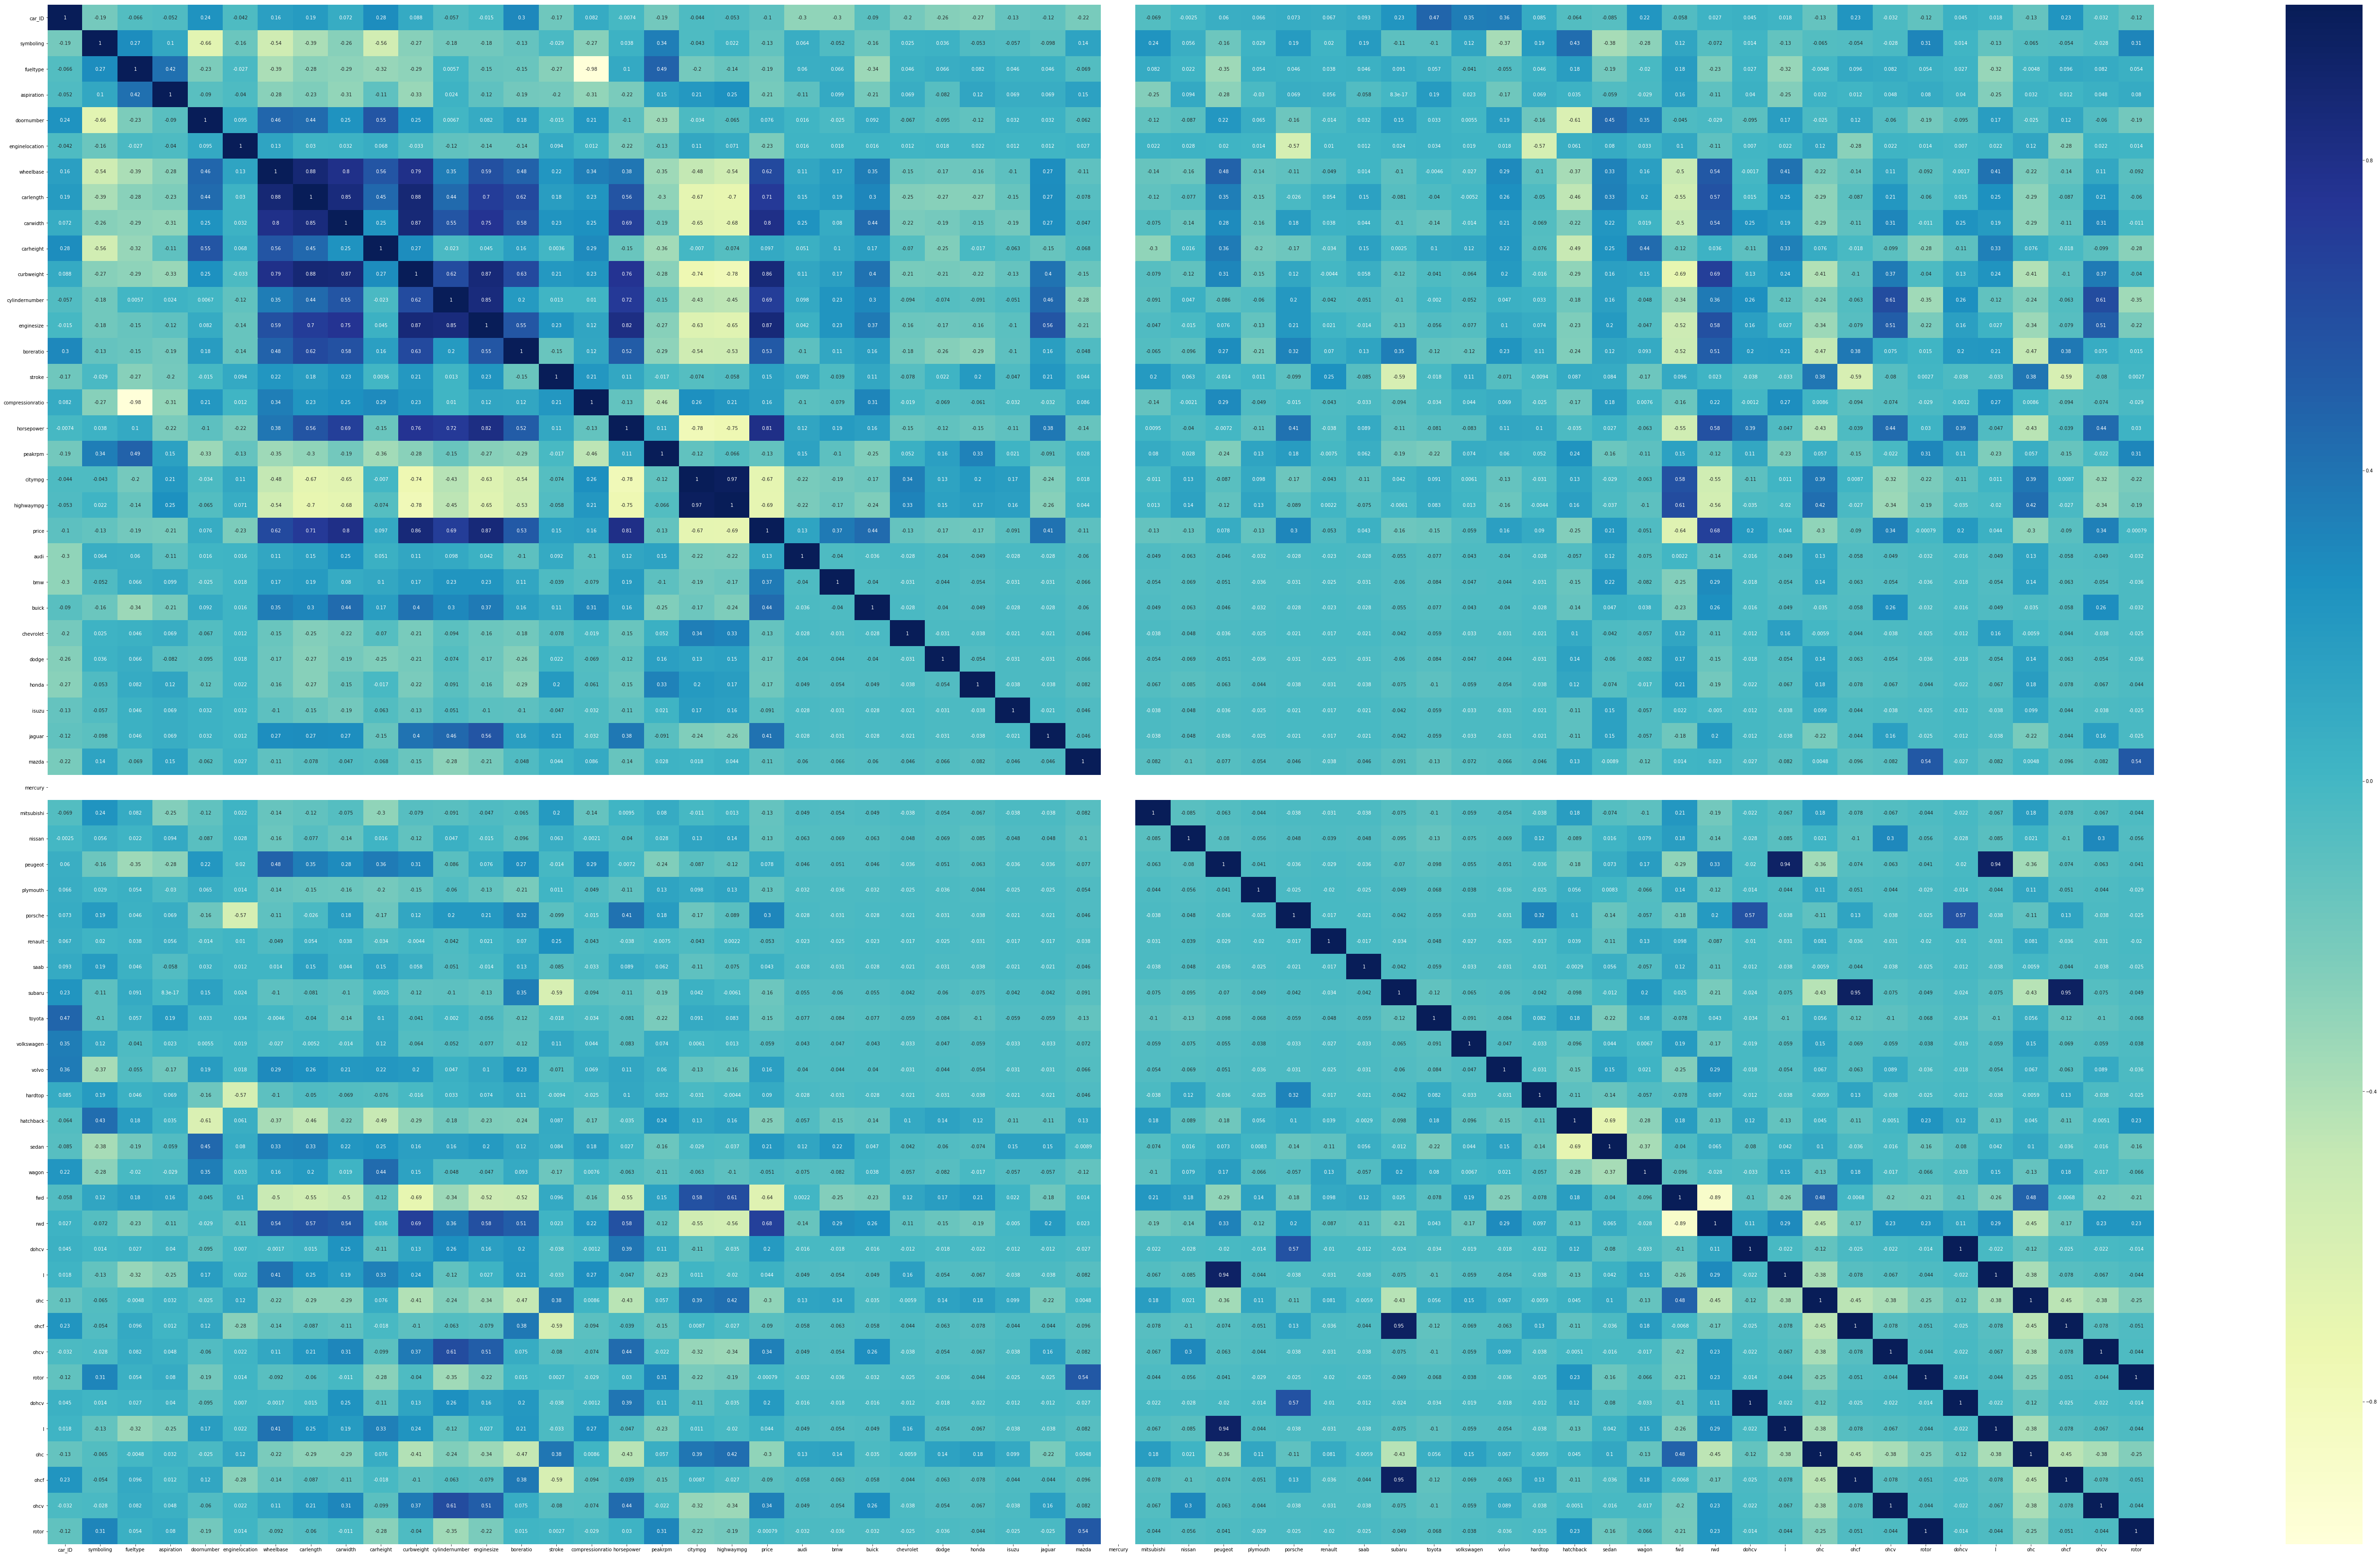

In [452]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (100, 60))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Highly correlated variables to price are - curbweight, enginesize, carwidth and fuelsystem.

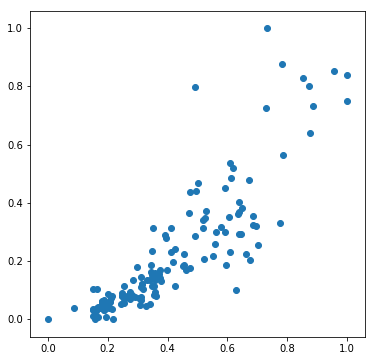

In [453]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.curbweight, df_train.price)
plt.show()

Dividing into X and Y sets for the model building

In [454]:
y_train = df_train.pop('price')
X_train = df_train

Building a linear model
Fit a regression line through the training data using statsmodels. 


In [455]:
#RFE( Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [456]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [457]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 38),
 ('symboling', False, 39),
 ('fueltype', True, 1),
 ('aspiration', False, 11),
 ('doornumber', False, 32),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 7),
 ('curbweight', True, 1),
 ('cylindernumber', False, 16),
 ('enginesize', True, 1),
 ('boreratio', False, 3),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 10),
 ('peakrpm', False, 6),
 ('citympg', False, 28),
 ('highwaympg', False, 5),
 ('audi', False, 34),
 ('bmw', True, 1),
 ('buick', False, 17),
 ('chevrolet', False, 21),
 ('dodge', False, 13),
 ('honda', False, 19),
 ('isuzu', False, 29),
 ('jaguar', False, 31),
 ('mazda', False, 35),
 ('mercury', False, 40),
 ('mitsubishi', False, 8),
 ('nissan', False, 27),
 ('peugeot', True, 1),
 ('plymouth', False, 14),
 ('porsche', True, 1),
 ('renault', False, 23),
 ('saab', False, 2),
 ('subaru', True, 1),
 ('toyota', False, 30),
 ('volkswagen', False, 2

In [458]:
X_train.columns[rfe.support_]

Index(['fueltype', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'curbweight', 'enginesize', 'stroke', 'compressionratio', 'bmw',
       'peugeot', 'porsche', 'subaru', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'ohcf', 'rotor', 'l'],
      dtype='object')

Building model using statsmodel, for the detailed statistics

In [459]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,fueltype,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,stroke,compressionratio,bmw,...,hardtop,hatchback,sedan,wagon,ohcf,ohcf,rotor,rotor,l,l
122,1,1,0.244828,0.426016,0.291667,0.272692,0.139623,0.525253,0.15000,0,...,0,0,1,0,0,0,0,0,0,0
125,1,1,0.272414,0.452033,0.666667,0.500388,0.339623,0.464646,0.15625,0,...,0,1,0,0,0,0,0,0,0,0
166,1,1,0.272414,0.448780,0.308333,0.314973,0.139623,0.449495,0.15000,0,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0.068966,0.450407,0.316667,0.411171,0.260377,0.247475,0.12500,0,...,0,0,0,0,0,0,0,0,0,0
199,1,1,0.610345,0.775610,0.575000,0.647401,0.260377,0.484848,0.03125,0,...,0,0,0,1,0,0,0,0,0,0


In [460]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

MODEL 1

In [461]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     101.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.35e-65
Time:                        10:59:22   Log-Likelihood:                 217.84
No. Observations:                 143   AIC:                            -395.7
Df Residuals:                     123   BIC:                            -336.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3809      0.125  

In [462]:
X_train_new.columns

Index(['const', 'fueltype', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'curbweight', 'enginesize', 'stroke', 'compressionratio',
       'bmw', 'peugeot', 'porsche', 'subaru', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'ohcf', 'ohcf', 'rotor', 'rotor', 'l', 'l'],
      dtype='object')

In [463]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
23,l,inf
21,rotor,inf
19,ohcf,inf
18,ohcf,inf
13,subaru,inf
22,l,inf
2,enginelocation,inf
20,rotor,inf
1,fueltype,71.070000
9,compressionratio,63.580000


In [464]:
X_train_new = X_train_new.drop(['l'], axis = 1)

In [465]:
X_train_new.columns

Index(['const', 'fueltype', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'curbweight', 'enginesize', 'stroke', 'compressionratio',
       'bmw', 'peugeot', 'porsche', 'subaru', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'ohcf', 'ohcf', 'rotor', 'rotor'],
      dtype='object')

MODEL 2

In [466]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     100.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.19e-65
Time:                        10:59:58   Log-Likelihood:                 213.54
No. Observations:                 143   AIC:                            -389.1
Df Residuals:                     124   BIC:                            -332.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3820      0.128  

In [467]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
21,rotor,inf
19,ohcf,inf
13,subaru,inf
20,rotor,inf
18,ohcf,inf
2,enginelocation,inf
1,fueltype,71.030000
9,compressionratio,63.530000
6,curbweight,20.790000
16,sedan,13.820000


In [468]:
X_train_new = X_train_new.drop(['ohcf'], axis = 1)

In [469]:
#Model 3
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     100.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.19e-65
Time:                        11:00:12   Log-Likelihood:                 213.54
No. Observations:                 143   AIC:                            -389.1
Df Residuals:                     124   BIC:                            -332.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6582      0.182  

In [470]:
checkVIF(X_train_new)

,Features,VIF
19,rotor,inf
18,rotor,inf
0,const,1382.810000
1,fueltype,71.030000
9,compressionratio,63.530000
6,curbweight,20.790000
16,sedan,13.820000
15,hatchback,11.730000
4,carlength,10.790000
7,enginesize,10.360000


In [471]:
X_train_new = X_train_new.drop(['rotor'], axis = 1)

In [472]:
#Model 4
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     96.86
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.16e-63
Time:                        11:00:28   Log-Likelihood:                 206.52
No. Observations:                 143   AIC:                            -377.0
Df Residuals:                     125   BIC:                            -323.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4670      0.181  

In [473]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,1262.87
1,fueltype,60.68
9,compressionratio,54.56
6,curbweight,16.42
16,sedan,13.82
15,hatchback,11.66
4,carlength,10.74
5,carwidth,7.72
3,wheelbase,7.59
17,wagon,7.25


In [474]:
X_train_new = X_train_new.drop(['compressionratio'], axis = 1)

In [475]:
#Model 5
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     103.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.08e-64
Time:                        11:00:42   Log-Likelihood:                 206.52
No. Observations:                 143   AIC:                            -379.0
Df Residuals:                     126   BIC:                            -328.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4597      0.099      4.

In [476]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,377.15
6,curbweight,14.52
15,sedan,13.62
14,hatchback,11.48
4,carlength,10.62
5,carwidth,7.72
3,wheelbase,7.57
16,wagon,7.10
7,enginesize,6.29
13,hardtop,2.54


In [478]:
X_train_new = X_train_new.drop(['sedan'], axis = 1)

In [479]:
#Model 6
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     106.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.49e-64
Time:                        11:01:09   Log-Likelihood:                 203.62
No. Observations:                 143   AIC:                            -375.2
Df Residuals:                     127   BIC:                            -327.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3959      0.096      4.

In [480]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,346.95
6,curbweight,13.70
4,carlength,10.44
5,carwidth,7.61
3,wheelbase,6.57
7,enginesize,6.29
2,enginelocation,2.19
11,porsche,2.10
8,stroke,1.95
12,subaru,1.68


In [481]:
X_train_new = X_train_new.drop(['wheelbase'], axis = 1)

In [482]:
#Model 7
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     113.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.67e-65
Time:                        11:01:32   Log-Likelihood:                 202.81
No. Observations:                 143   AIC:                            -375.6
Df Residuals:                     128   BIC:                            -331.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3902      0.096      4.

In [483]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,346.11
5,curbweight,13.69
3,carlength,8.53
4,carwidth,7.05
6,enginesize,6.28
2,enginelocation,2.19
10,porsche,2.02
7,stroke,1.94
11,subaru,1.68
13,hatchback,1.65


In [484]:
X_train_new = X_train_new.drop(['enginesize'], axis = 1)

In [485]:
#Model 8
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     118.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.10e-65
Time:                        11:01:50   Log-Likelihood:                 200.24
No. Observations:                 143   AIC:                            -372.5
Df Residuals:                     129   BIC:                            -331.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4044      0.097      4.

In [486]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,344.49
3,carlength,8.12
4,carwidth,7.02
5,curbweight,6.56
2,enginelocation,2.15
9,porsche,2.02
6,stroke,1.90
10,subaru,1.67
12,hatchback,1.60
11,hardtop,1.54


In [487]:
X_train_new = X_train_new.drop(['carlength'], axis = 1)

In [488]:
#Model 9
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     109.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           9.72e-62
Time:                        11:02:10   Log-Likelihood:                 188.91
No. Observations:                 143   AIC:                            -351.8
Df Residuals:                     130   BIC:                            -313.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3084      0.103      3.

In [490]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,329.38
3,carwidth,5.24
4,curbweight,5.22
2,enginelocation,2.12
5,stroke,1.90
8,porsche,1.79
9,subaru,1.67
10,hardtop,1.54
11,hatchback,1.33
1,fueltype,1.32


In [491]:
X_train_new = X_train_new.drop(['hardtop'], axis = 1)

In [492]:
#Model 10
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     119.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           9.09e-63
Time:                        11:02:32   Log-Likelihood:                 188.86
No. Observations:                 143   AIC:                            -353.7
Df Residuals:                     131   BIC:                            -318.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2941      0.092      3.

In [493]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,265.15
4,curbweight,5.22
3,carwidth,5.21
5,stroke,1.89
8,porsche,1.79
2,enginelocation,1.67
9,subaru,1.67
1,fueltype,1.32
7,peugeot,1.31
10,hatchback,1.30


In [494]:
X_train_new = X_train_new.drop(['fueltype'], axis = 1)

In [495]:
#Model 11
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     132.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.15e-63
Time:                        11:02:52   Log-Likelihood:                 188.42
No. Observations:                 143   AIC:                            -354.8
Df Residuals:                     132   BIC:                            -322.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2688      0.087      3.

In [496]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,240.32
3,curbweight,5.21
2,carwidth,5.20
7,porsche,1.79
4,stroke,1.77
1,enginelocation,1.67
8,subaru,1.65
9,hatchback,1.28
10,wagon,1.26
6,peugeot,1.19


In [497]:
X_train_new = X_train_new.drop(['hatchback'], axis = 1)

In [498]:
#Model 12
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     146.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.45e-64
Time:                        11:03:09   Log-Likelihood:                 187.92
No. Observations:                 143   AIC:                            -355.8
Df Residuals:                     133   BIC:                            -326.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2769      0.087      3.

In [499]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,238.11
3,curbweight,5.19
2,carwidth,5.17
4,stroke,1.76
7,porsche,1.71
8,subaru,1.65
1,enginelocation,1.62
9,wagon,1.19
6,peugeot,1.18
5,bmw,1.10


In [500]:
X_train_new = X_train_new.drop(['stroke'], axis = 1)

In [501]:
#Model 13
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     159.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.60e-64
Time:                        11:03:26   Log-Likelihood:                 185.03
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     134   BIC:                            -325.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2259      0.086      2.

In [502]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,223.21
3,curbweight,5.18
2,carwidth,5.09
6,porsche,1.66
1,enginelocation,1.62
8,wagon,1.18
5,peugeot,1.15
4,bmw,1.08
7,subaru,1.07


In [503]:
X_train_new = X_train_new.drop(['subaru'], axis = 1)

In [504]:
#Model 14
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     180.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.79e-65
Time:                        11:03:44   Log-Likelihood:                 184.08
No. Observations:                 143   AIC:                            -352.2
Df Residuals:                     135   BIC:                            -328.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2219      0.086      2.

In [505]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,222.94
3,curbweight,5.14
2,carwidth,5.08
6,porsche,1.66
1,enginelocation,1.62
5,peugeot,1.15
7,wagon,1.12
4,bmw,1.08


In [506]:
X_train_new = X_train_new.drop(['porsche'], axis = 1)

In [507]:
#Model 15
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     200.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.17e-65
Time:                        11:04:02   Log-Likelihood:                 180.56
No. Observations:                 143   AIC:                            -347.1
Df Residuals:                     136   BIC:                            -326.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3506      0.072      4.

In [508]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,149.37
3,curbweight,4.97
2,carwidth,4.68
5,peugeot,1.14
6,wagon,1.12
4,bmw,1.08
1,enginelocation,1.03


In [509]:
X_train_new = X_train_new.drop(['wagon'], axis = 1)

In [510]:
#Model 16
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     223.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.50e-64
Time:                        11:04:21   Log-Likelihood:                 175.16
No. Observations:                 143   AIC:                            -338.3
Df Residuals:                     137   BIC:                            -320.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3558      0.074      4.

In [511]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,149.30
3,curbweight,4.60
2,carwidth,4.38
5,peugeot,1.12
4,bmw,1.06
1,enginelocation,1.02


Residual Analysis of Model

In [513]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5,0,'Errors')

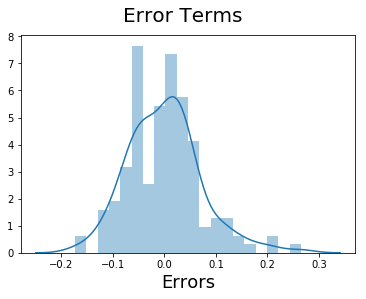

In [514]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

Prediction and Evaluation

In [515]:
num_vars = ['symboling','wheelbase', 'curbweight','carlength','carwidth','carheight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg' ,'price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [516]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [517]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [518]:
# Making predictions
y_pred = lm.predict(X_test_new)

Evaluation of test via comparison of y_pred and y_tes

In [519]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.809296247981573

Text(0,0.5,'y_pred')

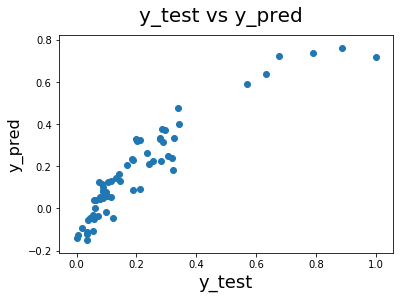

In [520]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

Evaluation of the model using Statistics

In [521]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     223.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.50e-64
Time:                        11:05:24   Log-Likelihood:                 175.16
No. Observations:                 143   AIC:                            -338.3
Df Residuals:                     137   BIC:                            -320.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3558      0.074      4.

Inference :
R-sqaured and Adjusted R-squared (extent of fit) - 0.891 and 0.887 - 90% variance explained.
F-stats and Prob(F-stats) (overall model fit) - 188 and 5.50e-63 - Model fit is significant and explained 90% variance is just not by chance.
p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.